# Coupled Cavity QED

$$\def\ket#1{\left|#1\right\rangle}
\def\timedel#1{\left(\tilde{t}-\tilde{\tau}_{#1}\right)}$$

## Model

A cavity of length $L$ and frequency $\omega_0$ is coupled to the outside world with a semitransparent mirror. The output field is reflected back from a perfectly reflecting mirror at distance $L'$. This induces a time-delayed feedback of the output signal into the cavity in the form

\begin{align}
G_k(t) = G_0\sin{(q_kL)}e^{i(\omega_0-\omega_k)t} = G_0(-1)^ke^{-i\omega_k^\prime t}
\end{align}
where
\begin{align}
\omega_k^\prime &= \frac{(2k+1)\pi}{\tau}\\
\tau &= \frac{2L}{c}
\end{align}

A two level system is interacting with the resonant cavity mode with a coupling strength $\gamma$. 
Everything is considered in the interaction picture, where the Hamiltonian can be expressed as
\begin{align}
H = -\hbar\gamma(\sigma^-a^\dagger + \sigma^+a) - \hbar\sum_{k=0}^\infty\left[G_k(t)a^\dagger d_k + G_k^*(t)d_k^\dagger a\right]
\end{align}

## One-excitation manifold

The considered wave function has the form
$$\ket{\psi}=c_e(t)\ket{e,0,\{0\}}+c_g(t)\ket{g,1,\{0\}}+\sum_kc_{g,k}(t)\ket{g,0,\{k\}}$$

## Equations of motion

\begin{align}
\partial_t c_e &= i\gamma c_g(t)\\
\partial_t c_g &= i\gamma c_e(t) - \underbrace{|G_0|^2\tau}_{2\kappa}\sum_{k=0}^{\infty}(-1)^kc_g(t-k\tau)\Theta(t-k\tau)
\end{align}


In [1]:
#%matplotlib inline
from math import *
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from pydelay import dde23

In [2]:
1/(np.pi)

0.3183098861837907

In [133]:
eqnsSTmany = {
    'ce1:c' : '(ii*gam1)*cg1',
    'ce2:c' : '(ii*gam2)*cg2',
    'cg1:c' : '(ii*gam1)*ce1 - kap1*4*(0.5*cg1+cg1(t-tau)*Heavi(t-tau)+cg1(t-2*tau)*Heavi(t-2*tau)\
    +cg1(t-3*tau)*Heavi(t-3*tau)+cg1(t-4*tau)*Heavi(t-4*tau)+cg1(t-5*tau)*Heavi(t-5*tau)\
    +cg1(t-6*tau)*Heavi(t-6*tau)+cg1(t-7*tau)*Heavi(t-7*tau)+cg1(t-8*tau)*Heavi(t-8*tau)\
    +cg1(t-9*tau)*Heavi(t-9*tau)+cg1(t-10*tau)*Heavi(t-10*tau)+cg1(t-11*tau)*Heavi(t-11*tau)\
    +cg1(t-12*tau)*Heavi(t-12*tau)+cg1(t-13*tau)*Heavi(t-13*tau)+cg1(t-14*tau)*Heavi(t-14*tau)\
    +cg1(t-15*tau)*Heavi(t-15*tau)+cg1(t-16*tau)*Heavi(t-16*tau)+cg1(t-17*tau)*Heavi(t-17*tau)\
    +cg1(t-18*tau)*Heavi(t-18*tau)+cg1(t-19*tau)*Heavi(t-19*tau)+cg1(t-20*tau)*Heavi(t-20*tau)+\
    r*(0.5*cg2+cg2(t-tau)*Heavi(t-tau)+cg2(t-2*tau)*Heavi(t-2*tau)\
    +cg2(t-3*tau)*Heavi(t-3*tau)+cg2(t-4*tau)*Heavi(t-4*tau)+cg2(t-5*tau)*Heavi(t-5*tau)\
    +cg2(t-6*tau)*Heavi(t-6*tau)+cg2(t-7*tau)*Heavi(t-7*tau)+cg2(t-8*tau)*Heavi(t-8*tau)\
    +cg2(t-9*tau)*Heavi(t-9*tau)+cg2(t-10*tau)*Heavi(t-10*tau)+cg2(t-11*tau)*Heavi(t-11*tau)\
    +cg2(t-12*tau)*Heavi(t-12*tau)+cg2(t-13*tau)*Heavi(t-13*tau)+cg2(t-14*tau)*Heavi(t-14*tau)\
    +cg2(t-15*tau)*Heavi(t-15*tau)+cg2(t-16*tau)*Heavi(t-16*tau)+cg2(t-17*tau)*Heavi(t-17*tau)\
    +cg2(t-18*tau)*Heavi(t-18*tau)+cg2(t-19*tau)*Heavi(t-19*tau)+cg2(t-20*tau)*Heavi(t-20*tau)))',
    'cg2:c' : '(ii*gam2)*ce2 - kap2*4*(1/r*(0.5*cg1+cg1(t-tau)*Heavi(t-tau)+cg1(t-2*tau)*Heavi(t-2*tau)\
    +cg1(t-3*tau)*Heavi(t-3*tau)+cg1(t-4*tau)*Heavi(t-4*tau)+cg1(t-5*tau)*Heavi(t-5*tau)\
    +cg1(t-6*tau)*Heavi(t-6*tau)+cg1(t-7*tau)*Heavi(t-7*tau)+cg1(t-8*tau)*Heavi(t-8*tau)\
    +cg1(t-9*tau)*Heavi(t-9*tau)+cg1(t-10*tau)*Heavi(t-10*tau)+cg1(t-11*tau)*Heavi(t-11*tau)\
    +cg1(t-12*tau)*Heavi(t-12*tau)+cg1(t-13*tau)*Heavi(t-13*tau)+cg1(t-14*tau)*Heavi(t-14*tau)\
    +cg1(t-15*tau)*Heavi(t-15*tau)+cg1(t-16*tau)*Heavi(t-16*tau)+cg1(t-17*tau)*Heavi(t-17*tau)\
    +cg1(t-18*tau)*Heavi(t-18*tau)+cg1(t-19*tau)*Heavi(t-19*tau)+cg1(t-20*tau)*Heavi(t-20*tau))+\
    (0.5*cg2+cg2(t-tau)*Heavi(t-tau)+cg2(t-2*tau)*Heavi(t-2*tau)\
    +cg2(t-3*tau)*Heavi(t-3*tau)+cg2(t-4*tau)*Heavi(t-4*tau)+cg2(t-5*tau)*Heavi(t-5*tau)\
    +cg2(t-6*tau)*Heavi(t-6*tau)+cg2(t-7*tau)*Heavi(t-7*tau)+cg2(t-8*tau)*Heavi(t-8*tau)\
    +cg2(t-9*tau)*Heavi(t-9*tau)+cg2(t-10*tau)*Heavi(t-10*tau)+cg2(t-11*tau)*Heavi(t-11*tau)\
    +cg2(t-12*tau)*Heavi(t-12*tau)+cg2(t-13*tau)*Heavi(t-13*tau)+cg2(t-14*tau)*Heavi(t-14*tau)\
    +cg2(t-15*tau)*Heavi(t-15*tau)+cg2(t-16*tau)*Heavi(t-16*tau)+cg2(t-17*tau)*Heavi(t-17*tau)\
    +cg2(t-18*tau)*Heavi(t-18*tau)+cg2(t-19*tau)*Heavi(t-19*tau)+cg2(t-20*tau)*Heavi(t-20*tau)))'
    }

paramsST = {
            'gam1' : 10.,
            'gam2' : 10.,
            'kap1' : 1.000000,
            'kap2' : 1.000000,
            'tau'  : pi/10.,
            'r'    : 1.
                        }

mycode = """
double Heavi(double t) {
    if(t>=0)
        return 1.0;
    else
        return 0.0;
}
"""

ddeSTmany = dde23(eqns=eqnsSTmany, params=paramsST)
ddeSTmany.set_sim_params(tfinal=20*paramsST['tau'], dtmax=.001)

In [134]:
histfuncST = { 'ce1': lambda t: 1.,
              'ce2': lambda t: 0.,
              'cg1': lambda t: 0.,
              'cg2': lambda t: 0.
             }
ddeSTmany.hist_from_funcs(histfuncST, 51)

In [135]:
ddeSTmany.run()

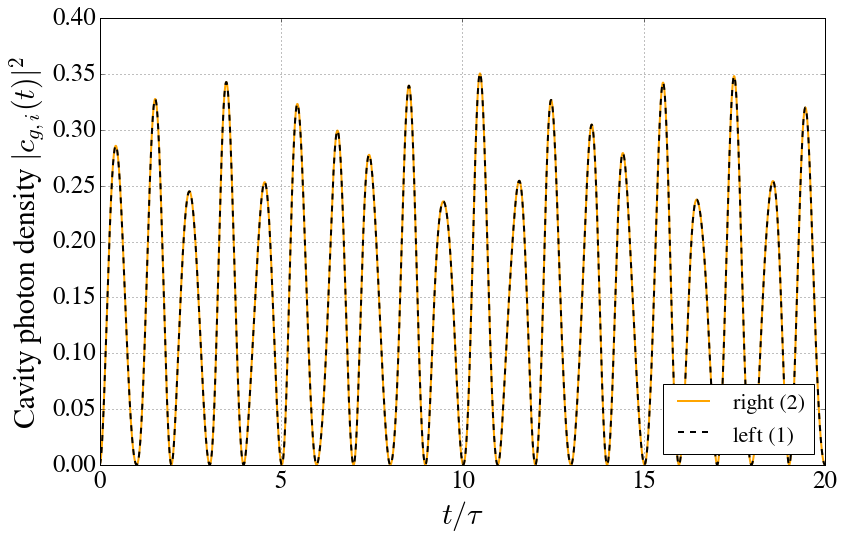

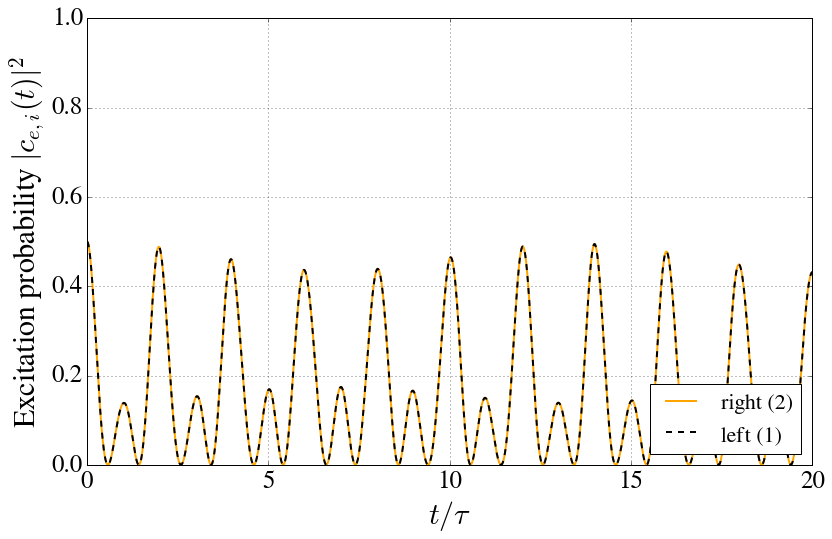

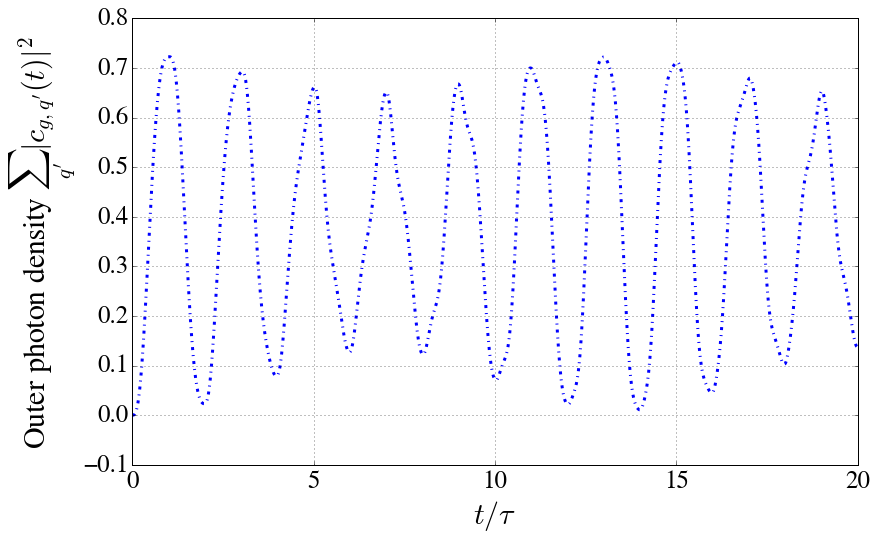

In [137]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

solmany = ddeSTmany.sample(0,20*paramsST['tau'],0.001)
tSTmany  = solmany['t']/paramsST['tau']
ce1STmany = solmany['ce1']
cg1STmany = solmany['cg1']
ce2STmany = solmany['ce2']
cg2STmany = solmany['cg2']

fsfont = {'fontname':'FreeSerif'}
plt.figure(1,figsize=(13,8))
plt.clf()
plt.plot(tSTmany,np.abs(cg2STmany)**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(tSTmany,np.abs(cg1STmany)**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
#plt.xlim(0,3)
plt.ylabel('Cavity photon density $|c_{g,i}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
plt.grid(True)
plt.figure(2,figsize=(13,8))
plt.ylim(0,1)
plt.plot(tSTmany,np.abs(ce2STmany)**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(tSTmany,np.abs(ce1STmany)**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylabel('Excitation probability $|c_{e,i}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
#plt.xlim(0,3)
plt.grid(True)
plt.figure(3,figsize=(13,8))
plt.plot(tSTmany,1-(np.abs(ce1STmany)**2+np.abs(ce2STmany)**2+np.abs(cg1STmany)**2+np.abs(cg2STmany)**2),\
         linewidth=3.0,label='multi-delay',color='b',ls='-.')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylabel('Outer photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
#plt.legend(loc='upper right',fontsize = 22)
#plt.xlim(0,3)
plt.grid(True)
plt.show()

## Numerics

In [143]:
#Defining equations
import numpy as np
from scipy.integrate import ode

N  = 100
qp = np.linspace(-N/2,N/2,N+1)
#print(qp[0:N+3])

y0, t0 = [1.0/np.sqrt(2), 0., 1.0/np.sqrt(2), 0.0]+ np.zeros(N+1).tolist(), 0

#arg: 0->gam1, 1->gam2, 2->kap1, 3->kap2, 4->s, 5->tau
def f(t, y, arg):
    qpcoef = (-1)**qp * np.exp(-1j*2*np.pi*qp*t/arg[5])
    return [1j*arg[0]*y[1],\
            1j*arg[0]*y[0]+1j*arg[2]*arg[4]*np.sum(qpcoef*y[4:N+5]),\
            1j*arg[1]*y[3],\
            1j*arg[1]*y[2]+1j*arg[3]*arg[4]*np.sum(qpcoef*y[4:N+5])] + \
(1j*np.conjugate(qpcoef)*(arg[2]*y[1]+arg[3]*y[3])).tolist()
def jac(t, y, arg):
    qpcoef = (-1)**qp * np.exp(-1j*2*np.pi*qp*t/arg[5])
    jacobian = np.zeros((N+5,N+5),'complex')
    jacobian[0:2,0:2] = np.array([[0,1j*arg[0]],[1j*arg[0],0]])
    jacobian[0:2,2:4] = np.zeros((2,2))
    jacobian[2:4,0:2] = np.zeros((2,2))
    jacobian[2:4,2:4] = np.array([[0,1j*arg[1]],[1j*arg[1],0]])
    jacobian[0,4:N+5] = np.zeros(N+1)
    jacobian[1,4:N+5] = 1j*qpcoef*arg[4]*arg[2]
    jacobian[2,4:N+5] = np.zeros(N+1)
    jacobian[3,4:N+5] = 1j*qpcoef*arg[4]*arg[3]
    jacobian[4:N+5,0] = np.zeros(N+1)
    jacobian[4:N+5,1] = 1j*arg[2]*np.conjugate(qpcoef)
    jacobian[4:N+5,2] = np.zeros(N+1)
    jacobian[4:N+5,3] = 1j*arg[3]*np.conjugate(qpcoef)
    jacobian[4:N+5,4:N+5] = np.zeros((N+1,N+1))
    #print(jacobian)
    return jacobian.tolist()

In [144]:
r = ode(f, jac).set_integrator('zvode', method='bdf', with_jacobian=True)
s = 1.
kap1 = 1.
kap2 = 1.
tau = np.pi/10.
G01 = 2*np.sqrt(kap1/s/tau) #See notes for the connection between kappap and G0 (assumed to be real)
G02 = 2*np.sqrt(kap2/s/tau) #See notes for the connection between kappap and G0 (assumed to be real)
gam1 = 10.
gam2 = 10.
arg = [gam1,gam2,G01,G02,s,tau]
r.set_initial_value(y0, t0).set_f_params(arg).set_jac_params(arg)
t1 = 20.*tau
dt = 0.01

time = np.array([t0/tau])
#print(time)
sol  = np.array([y0])
#print(sol)
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    #print(r.t/arg[2])
    #print(r.y)
    time = np.append(time, np.array([r.t/tau]), axis=0)
    sol  = np.append(sol, np.array([r.y]), axis=0)

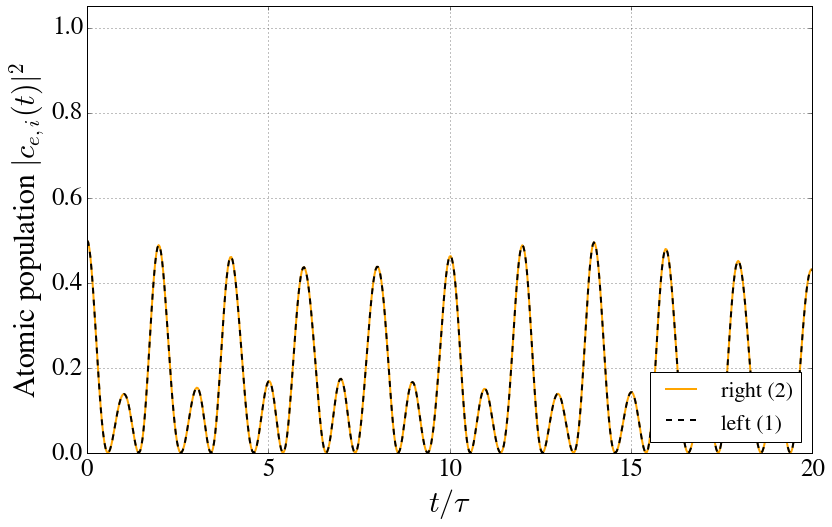

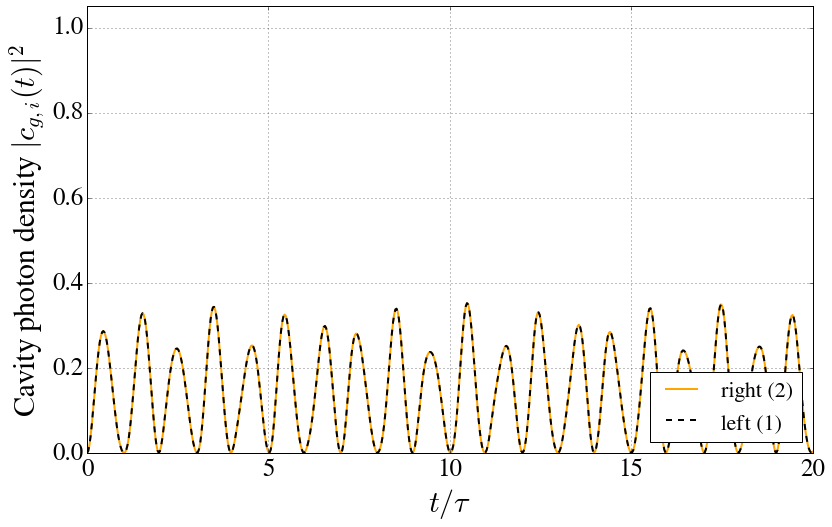

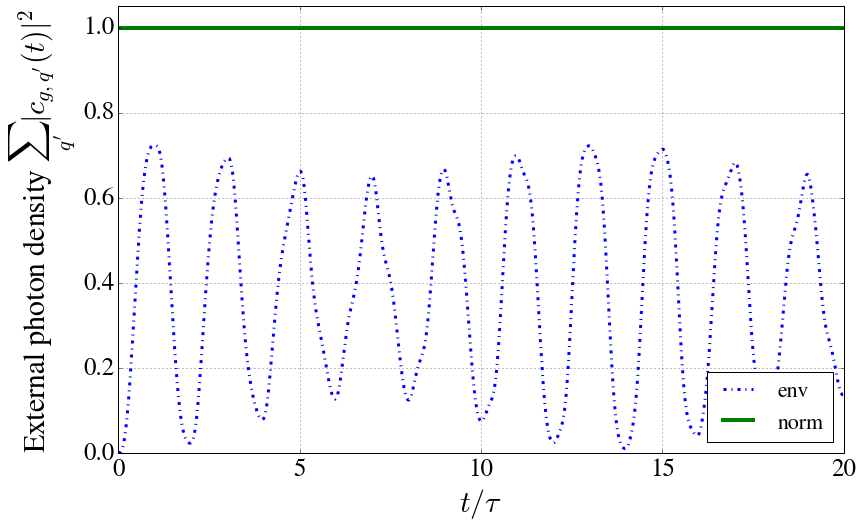

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

env = np.zeros(len(time))
for ti in range(0,len(time)):
    env[ti] = s*np.sum(np.abs(sol[ti,4:(N+5)])**2)
fsfont = {'fontname':'FreeSerif'}
plt.figure(1,figsize=(13,8))
plt.clf()
plt.ylim(0,1.05)
plt.plot(time,np.abs(sol[:,2])**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(time,np.abs(sol[:,0])**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Atomic population $|c_{e,i}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
plt.grid(True)
plt.figure(2,figsize=(13,8))
plt.clf()
plt.ylim(0,1.05)
plt.plot(time,np.abs(sol[:,3])**2,linewidth=2.0,label='right (2)',color = 'orange')
plt.hold(True)
plt.plot(time,np.abs(sol[:,1])**2,linewidth=2.0,label='left (1)',color='k',ls='--')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Cavity photon density $|c_{g,i}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
plt.grid(True)
plt.figure(3,figsize=(13,8))
plt.clf()
plt.plot(time,env,linewidth=3.0,label='env',color = 'blue', ls="-.")
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
#plt.ylabel('Larger cavity photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
#plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)

#plt.figure(4,figsize=(13,8))
#plt.clf()
plt.ylim(0,1.05)
plt.hold(True)
plt.plot(time,env+np.abs(sol[:,1])**2+np.abs(sol[:,0])**2+np.abs(sol[:,2])**2+np.abs(sol[:,3])**2\
         ,linewidth=4.0,label='norm',color = 'green')
plt.xlabel('$t/\\tau$',fontsize=30.)
#plt.xlim(0,3)
plt.ylabel('External photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
plt.legend(loc='lower right',fontsize = 22)
#plt.grid(True)
plt.show()

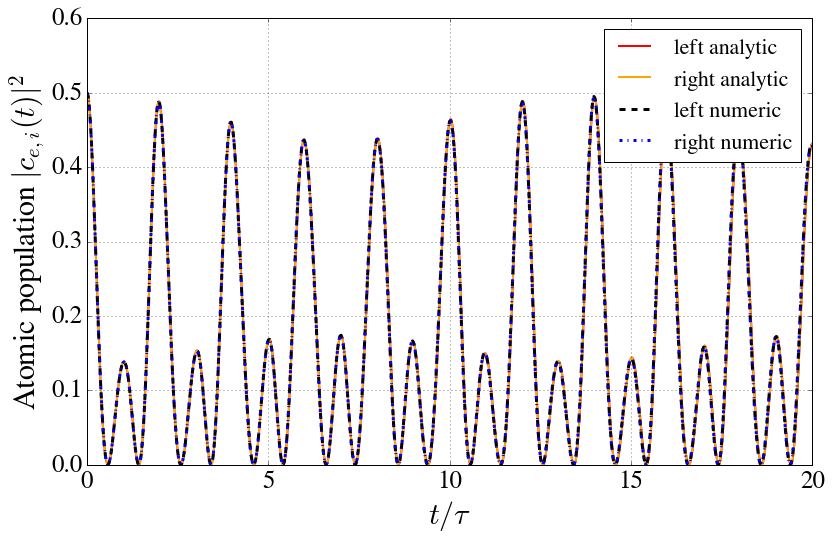

In [146]:
plt.figure(1,figsize=(13,8))
plt.clf()
plt.plot(tSTmany,np.abs(ce1STmany)**2,linewidth=2.0,label='left analytic',color='red',ls='-')
plt.hold(True)
plt.plot(tSTmany,np.abs(ce2STmany)**2,linewidth=2.0,label='right analytic',color = 'orange')
plt.plot(time,np.abs(sol[:,0])**2,linewidth=3.0,label='left numeric',color='k',ls='--')
plt.plot(time,np.abs(sol[:,2])**2,linewidth=3.0,label='right numeric',color = 'blue',ls="-.")
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,20)
plt.ylabel('Atomic population $|c_{e,i}(t)|^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)
